In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.covariance import EllipticEnvelope

In [4]:
df = pd.read_csv('data.csv')

In [6]:
df['Trader'].replace(['trader A', 'trader B', 'trader C', 'trader E'], [0, 1, 2, 3], inplace=True)
df['Status'].replace(['Closed', 'Sold'], [0,1], inplace=True)
df['Trade Type'].replace(['Call', 'Put'], [0,1], inplace=True)

In [7]:
df = df.drop(['Asset Name'], axis=1)

In [8]:
df['Trading Time'] = pd.to_datetime(df['Trading Time'])
df['Close Time'] = pd.to_datetime(df['Close Time'])

In [9]:
df = df.drop(['Trading Time', 'Close Time'], axis=1)

In [10]:
clf_ee = EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=12345, store_precision=True, support_fraction=0.7)
y_predict = clf_ee.fit_predict(df)
ee_predict = pd.Series(y_predict).replace([-1, 1], [1, 0])
ee_anomalies = df[ee_predict==1]

In [11]:
cmap = np.array(['skyblue', 'red'])

In [13]:
def plot_EE(i):
    plt.scatter(df.iloc[:, i], df.iloc[:, i+1], c='skyblue', s=40, edgecolor="k")
    plt.scatter(ee_anomalies.iloc[:,i], ee_anomalies.iloc[:,i+1], c='red', s=40, edgecolor="k")
    plt.title("Visualize Elliptic Envelope Anomalies between Feature Pair: V{} and V{}".format(i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

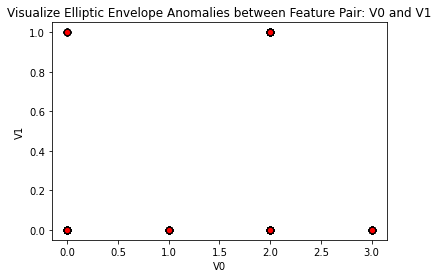

In [14]:
plot_EE(0)

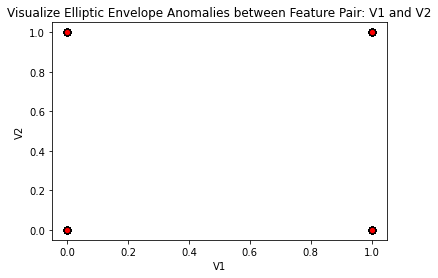

In [15]:
plot_EE(1)

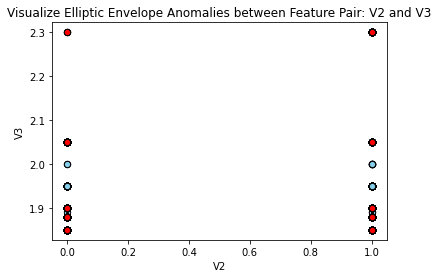

In [16]:
plot_EE(2)

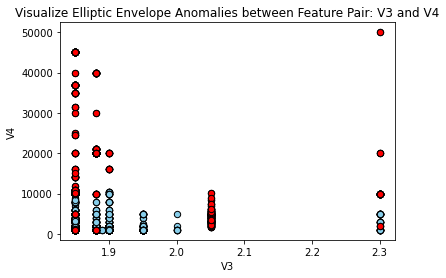

In [17]:
plot_EE(3)

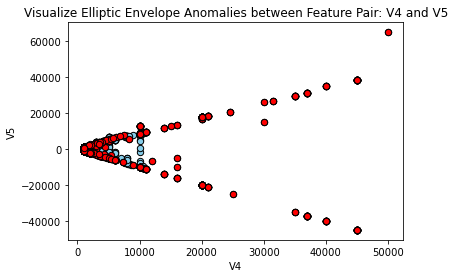

In [18]:
plot_EE(4)

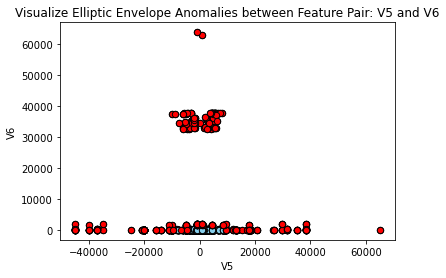

In [19]:
plot_EE(5)

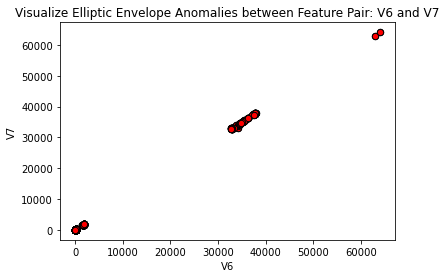

In [20]:
plot_EE(6)